# LetsGrowMore Virtual Internship Program (December-2021)


Beginner Level Task 2

Name :-Ayush Marar

Task 2 :- Stock Market Prediction and Forecasting using Stacked L

**Import Libraries**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the data**

In [52]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [53]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [54]:
df=data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Close value graph**

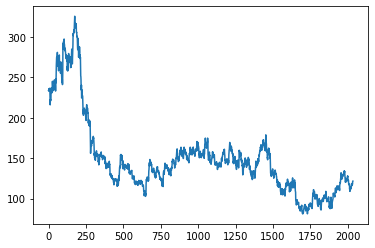

In [55]:
d_close = df['Close']
plt.plot(d_close)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Splitting into Training and Testing data**

In [57]:
training_size=int(len(d_close)*0.72)
test_size=len(d_close)-training_size
train_data=d_close[0:training_size,:]
test_data=d_close[training_size:len(d_close),:1]

**Data Preprocessing**

In [58]:
def create_dataset(dataset, time_step=1):
    x_data= []
    y_data= []
    for i in range(len(dataset)-time_step-1):
      x_data.append(dataset[i:(i+time_step), 0])
      y_data.append(dataset[i + time_step, 0])
      return np.array(x_data), np.array(y_data)

In [59]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [60]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [61]:
x_train.shape

(1, 100, 1)

In [62]:
y_train.shape

(1,)

**Importing required modules for the stacked LSTM**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))


In [67]:
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.8140 - val_loss: 0.0052
Epoch 2/100
1/1 [==============================] - 0s 133ms/step - loss: 0.6664 - val_loss: 0.0019
Epoch 3/100
1/1 [==============================] - 0s 114ms/step - loss: 0.5382 - val_loss: 1.3642e-04
Epoch 4/100
1/1 [==============================] - 0s 120ms/step - loss: 0.4152 - val_loss: 6.4547e-04
Epoch 5/100
1/1 [==============================] - 0s 120ms/step - loss: 0.2902 - val_loss: 0.0051
Epoch 6/100
1/1 [==============================] - 0s 128ms/step - loss: 0.1651 - val_loss: 0.0172
Epoch 7/100
1/1 [==============================] - 0s 130ms/step - loss: 0.0558 - val_loss: 0.0436
Epoch 8/100
1/1 [==============================] - 0s 125ms/step - loss: 4.0644e-04 - val_loss: 0.0904
Epoch 9/100
1/1 [==============================] - 0s 144ms/step - loss: 0.0468 - val_loss: 0.1274
Epoch 10/100
1/1 [==============================] - 0s 136ms/step - loss: 0.1075 - val_loss: 0.1313


In [68]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**RMSE performance metrics**

In [69]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

292.796056011923

**Test Data RMSE**

math.sqrt(mean_squared_error(y_test,test_predict))

**Shifting train predictions for plotting**

In [71]:
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

**Shifting test predictions for plotting**

In [72]:
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

**Plotting**

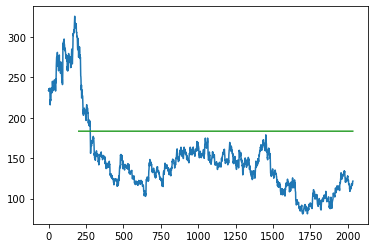

In [73]:
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [74]:
len(test_data), x_test.shape

(570, (1, 100, 1))

In [75]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

**Prediction for next 50 days**

In [77]:
lt_output=[]
n_steps=100
next_No_Of_Days = 50
i=0

while(i<next_No_Of_Days):
    
        if(len(tem_input)>100):
           x_input=np.array(tem_input[1:])
           print("{} day input {}".format(i,x_input))
           x_input=x_input.reshape(1,-1)
           x_input = x_input.reshape((1, n_steps, 1))
           yt = regressor.predict(x_input, verbose=0)
           print("{} day output {}".format(i,yt))
           tem_input.extend(yt[0].tolist())
           tem_input=tem_input[1:]
           lt_output.extend(yt.tolist())
           i=i+1
        else:
           x_input = x_input.reshape((1, n_steps,1))
           yt = regressor.predict(x_input, verbose=0)
           print(yt[0])
           tem_input.extend(yt[0].tolist())
           print(len(tem_input))
           lt_output.extend(yt.tolist())
           i=i+1
    
print(lt_output)

[0.43513688]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

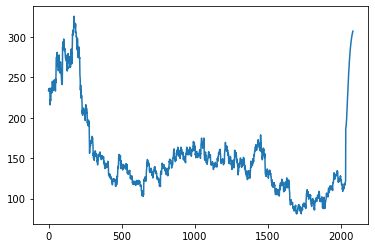

In [78]:
df = d_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)